In [1]:
import sympy as sp
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv

In [2]:
r, theta, phi, A, A_tilde, a = sp.symbols('r theta phi A A_tilde a')
n, m = sp.symbols('n m', integer= True)

func_r =sp.cos(theta)*sp.sin(theta)**2
display(func_r)
display(sp.diff(func_r,theta)) #integral grænser


sin(theta)**2*cos(theta)

-sin(theta)**3 + 2*sin(theta)*cos(theta)**2

In [3]:
theta_int = -sp.sin(theta)**2*(n+1) + sp.sin(theta)**3 - 2*sp.sin(theta)*sp.cos(theta)**2 + 1
display(theta_int)
display(sp.integrate(theta_int,(theta))) #integral grænser

display(sp.integrate(theta_int,(theta, 0,sp.pi))) #integral grænser


-(n + 1)*sin(theta)**2 + sin(theta)**3 - 2*sin(theta)*cos(theta)**2 + 1

theta + (-n - 1)*(theta/2 - sin(theta)*cos(theta)/2) + cos(theta)**3 - cos(theta)

pi*(-n - 1)/2 + pi

In [4]:
func_phi = (A*sp.cos(m*phi) + A_tilde * sp.sin(m*phi))*sp.cos(phi)
display(func_phi)
display(sp.integrate(func_phi,(phi, 0, 2*sp.pi))) #integral grænser


(A*cos(m*phi) + A_tilde*sin(m*phi))*cos(phi)

Piecewise((pi*A, Eq(m, -1) | Eq(m, 1)), (0, True))

In [5]:
func_phi = (-A*sp.sin(m*phi)*m + A_tilde * sp.cos(m*phi)*m)*sp.sin(phi)
display(func_phi)
display(sp.integrate(func_phi,(phi, 0, 2*sp.pi))) #integral grænser


(-A*m*sin(m*phi) + A_tilde*m*cos(m*phi))*sin(phi)

Piecewise((-pi*A, Eq(m, -1) | Eq(m, 1)), (0, True))

In [6]:
def legendre_poly_cos(n1, m1, x):
    if n1 == 1 and m1 == 0:
        return sp.cos(x)
    elif n1==1 and m1 == -1:
        return 1/2 * sp.sin(x)
    elif n1 == 2 and m1 == 0:
        return 1 / 2 * (3 * sp.cos(x) ** 2 - 1)
    elif n1 == 3 and m1 == 0:
        return 1 / 2 * (5 * sp.cos(x) ** 3 - 3 * sp.cos(x))
    elif n1 == 4 and m1 == 0:
        return 1 / 8 * (35 * sp.cos(x) ** 4 - 30 * sp.cos(x) ** 2 + 3)
    elif n1 == 1 and m1 == 1:
        return -sp.sin(x)
    elif n1 == 2 and m1 == 1:
        return -3 * sp.cos(x) * sp.sin(x)
    elif n1 == 2 and m1 == 2:
        return 3*sp.sin(x) ** 2
    elif n1 == 3 and m1 == 1:
        return 3/2 * (1 - 5 * sp.cos(x)**2)*(1 - sp.cos(x)**2)**(1/2)
    elif n1 == 3 and m1 == 2:
        return 15 * sp.cos(x) * (1 - sp.cos(x) ** 2)
    elif n1 == 3 and m1 == 3:
        return -15 * (1 - sp.cos(x) ** 2) ** (3 / 2)
    elif n1 == 4 and m1 == 1:
        return 5/2 * sp.cos(x) * (3 - 7 * sp.cos(x) ** 2) * ( 1 - sp.cos(x) ** 2) ** (1 / 2)
    elif n1 == 4 and m1 == 2:
        return 15/2 * (7 * sp.cos(x) ** 2 - 1) * (1 - sp.cos(x) ** 2) 
    elif n1 == 4 and m1 == 3:
        return -105 * sp.cos(x) * (1 - sp.cos(x) ** 2) ** (3 / 2)
    elif n1 == 4 and m1 == 4:
        return 105*(1 - sp.cos(x)**2)**2
    
def legendre_poly(n1, m1, x):
    if n1 == 1 and m1 == 0:
        return x
    elif n1 == 2 and m1 == 0:
        return 1 / 2 * (3 * x ** 2 - 1)
    elif n1 == 3 and m1 == 0:
        return 1 / 2 * (5 * x ** 3 - 3 * x)
    elif n1 == 4 and m1 == 0:
        return 1 / 8 * (35 * x ** 4 - 30 * x ** 2 + 3)
    elif n1 == 1 and m1 == 1:
        return -(1-x**2)**(1/2)
    elif n1 == 2 and m1 == 1:
        return -3 * x * (1-x**2)**(1/2)
    elif n1 == 2 and m1 == 2:
        return 3*(1-x**2)
    elif n1 == 3 and m1 == 1:
        return 3/2 * (1 - 5 * x**2)*(1 - x**2)**(1/2)
    elif n1 == 3 and m1 == 2:
        return 15 * x * (1 -x ** 2)
    elif n1 == 3 and m1 == 3:
        return -15 * (1 - x ** 2) ** (3 / 2)
    elif n1 == 4 and m1 == 1:
        return 5/2 * x * (3 - 7 * x ** 2) * ( 1 - x ** 2) ** (1 / 2)
    elif n1 == 4 and m1 == 2:
        return 15/2 * (7 * x ** 2 - 1) * (1 -x ** 2) 
    elif n1 == 4 and m1 == 3:
        return -105 * x * (1 - x ** 2) ** (3 / 2)
    elif n1 == 4 and m1 == 4:
        return 105*(1 - x**2)**2
    elif n1==5 and m1==1:
        return 9/4*x* ( 5/2 * x * (3 - 7 * x ** 2) * ( 1 - x ** 2) ** (1 / 2)) - 5/4 * 3/2 * (1 - 5 * x**2)*(1 - x**2)**(1/2)
    elif n1==5 and m1==2:
        return 3*x*15/2 * (7 * x ** 2 - 1) * (1 -x ** 2) - 2 * 15 * x * (1 -x ** 2)
    elif n1<m1:
        return 0

In [7]:
legendre_poly(1,1, theta)

-(1 - theta**2)**0.5

In [8]:
n1=3
m1=0
func_theta = ( theta**2 -1)**n
display(func_theta)

display(sp.integrate(func_theta,(theta, -1, 1))) #integral grænser


(theta**2 - 1)**n

2*exp(I*pi*n)*hyper((1/2, -n), (3/2,), 1)

In [17]:
t = np.linspace(0, np.pi, 4_000_000)
l = legendre_poly(5,1, np.cos(t))
l*= -np.sin(t)**2 * (5+1) + np.sin(t)**3 - 2*np.sin(t)*np.cos(t)**2 + 1
dt = np.pi/4_000_000
np.sum(dt*l)

-1.125630669495903

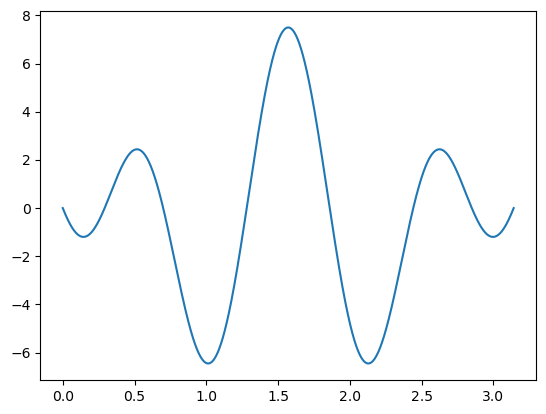

In [18]:
plt.plot(t, l)